In [2]:
# %% Load Dataset and Preprocessing

import numpy as np  # Sayısal işlemler için
import pandas as pd  # Veri işleme için (şimdilik kullanılmıyor ama genelde lazım)
import matplotlib.pyplot as plt  # Grafik çizimi için

from sklearn.model_selection import train_test_split, GridSearchCV  # Veri bölme ve hiperparametre arama
from sklearn.preprocessing import StandardScaler  # Veriyi ölçeklendirme
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  # Regresyon modelleri
from sklearn.metrics import mean_squared_error, r2_score  # Model performans ölçümleri
from sklearn.datasets import fetch_california_housing  # Veri seti yükleme

import warnings
warnings.filterwarnings("ignore")  # Uyarıları gizle

# Veri setini yükle
california = fetch_california_housing()
X = california.data  # Özellikler
y = california.target  # Hedef değişken

# Veriyi eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Veriyi standartlaştır (ortalama=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Eğitim verisini ölçeklendir
X_test_scaled = scaler.transform(X_test)  # Test verisini aynı ölçekle dönüştür

In [3]:
# %% Lineer, Ridge ve Lasso Regresyon Modelleri ile Eğitim ve Hiperparametre Ayarı

# Linear Regression
lin_reg = LinearRegression()  # Lineer regresyon modeli oluştur
lin_reg.fit(X_train_scaled, y_train)  # Modeli eğitim verisiyle eğit

y_pred_lin = lin_reg.predict(X_test_scaled)  # Test verisiyle tahmin yap

mse_lin = mean_squared_error(y_test, y_pred_lin)  # Ortalama kare hata hesapla
r2_lin = r2_score(y_test, y_pred_lin)  # R² skorunu hesapla
print(f"Linear Regression MSE: {mse_lin}, R2: {r2_lin}")  # Sonuçları yazdır

"""
Linear Regression MSE: 0.5326880002308442, R2: 0.5930685086384744
"""

# Ridge (L2) Regression
ridge_params = {"alpha": [0.1, 1, 10, 100]}  # Denenecek alpha değerleri
ridge = Ridge()  # Ridge regresyon modeli
ridge_grid = GridSearchCV(ridge, ridge_params)  # En iyi alpha için GridSearchCV kullan
ridge_grid.fit(X_train_scaled, y_train)  # Modeli eğit

y_pred_ridge = ridge_grid.predict(X_test_scaled)  # Test verisiyle tahmin yap

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}, R2: {r2_ridge}")

"""
Ridge Regression MSE: 0.532446883951647, R2: 0.5932527024011324
"""

# Lasso (L1) Regression
lasso_params = {"alpha": [0.1, 1, 10, 100]}  # Denenecek alpha değerleri
lasso = Lasso(max_iter=10000)  # Maks iterasyon artırıldı
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)  # 5 katlı çapraz doğrulama
lasso_grid.fit(X_train_scaled, y_train)  # Modeli eğit

y_pred_lasso = lasso_grid.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso} R2: {r2_lasso}")
print(f"Lasso Regression Best Alpha: {lasso_grid.best_params_}")  # En iyi alpha'yı göster

"""
Lasso Regression MSE: 0.6667118011405431 R2: 0.49068492733292735
"""

Linear Regression MSE: 0.5236020565256152, R2: 0.5951892790870101
Ridge Regression MSE: 0.523663666322904, R2: 0.5951416469088227
Lasso Regression MSE: 0.6705426934978042 R2: 0.48158555189993835
Lasso Regression Best Alpha: {'alpha': 0.1}


'\nLasso Regression MSE: 0.6667118011405431 R2: 0.49068492733292735\n'

In [4]:
# %% ElasticNet Training and Hyperparameter tuning

elastic_params = {
    "alpha": [0.1, 1, 10],        # Regularization strength seçenekleri
    "l1_ratio": [0.2, 0.5, 0.8]   # L1 ve L2 karışım oranları
}
elastic = ElasticNet(max_iter=10000)  # ElasticNet modeli, iterasyon sayısını artırdık
elastic_grid = GridSearchCV(elastic, elastic_params, cv=5)  # 5 katlı çapraz doğrulama ile en iyi parametreyi bul
elastic_grid.fit(X_train_scaled, y_train)  # Modeli eğitim verisiyle eğit

y_pred_elastic = elastic_grid.predict(X_test_scaled)  # Test verisi üzerinde tahmin yap

mse_elastic = mean_squared_error(y_test, y_pred_elastic)  # Ortalama kare hatayı hesapla
r2_elastic = r2_score(y_test, y_pred_elastic)  # R2 skorunu hesapla

print(f"ElasticNet Regression MSE: {mse_elastic}, R2: {r2_elastic}")  # Performans sonuçlarını yazdır
print(f"ElasticNet Regression best params: {elastic_grid.best_params_}")  # En iyi parametreleri göster

ElasticNet Regression MSE: 0.5938247601283292, R2: 0.5408982332143071
ElasticNet Regression best params: {'alpha': 0.1, 'l1_ratio': 0.2}


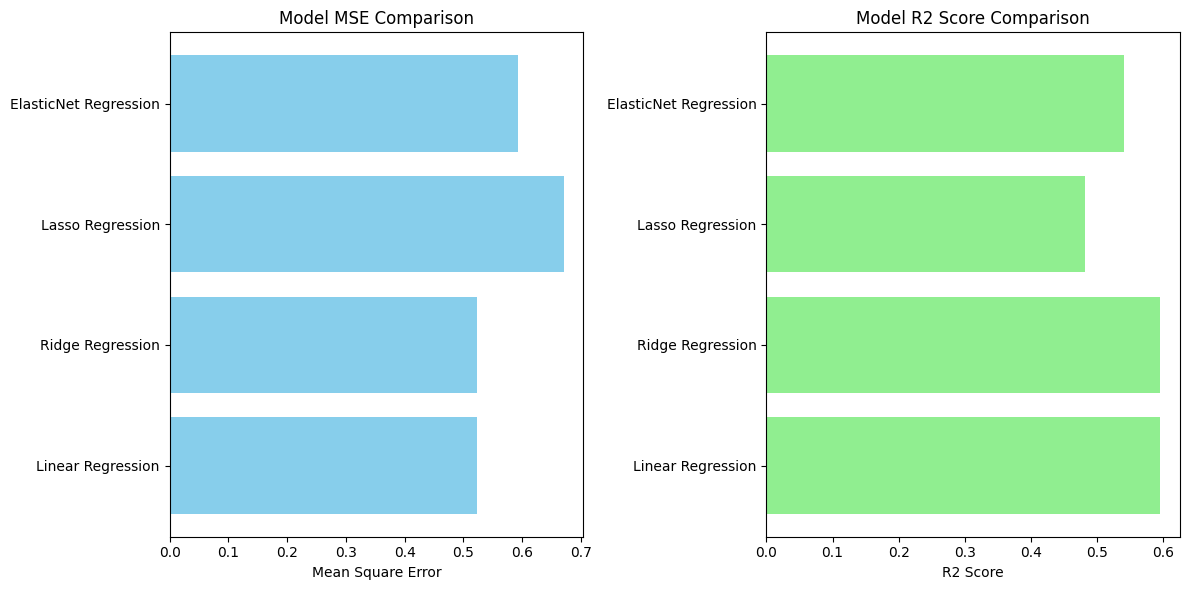

In [5]:
# %% Model Comparison (Model Karşılaştırması)

models = ["Linear Regression", "Ridge Regression", "Lasso Regression", "ElasticNet Regression"]  # Modellerin isimleri
mses = [mse_lin, mse_ridge, mse_lasso, mse_elastic]  # Modellerin Ortalama Kare Hata değerleri
r2s = [r2_lin, r2_ridge, r2_lasso, r2_elastic]       # Modellerin R2 skorları

plt.figure(figsize=(12, 6))  # Grafik boyutu ayarla

# MSE için yatay bar grafiği
plt.subplot(1, 2, 1)
plt.barh(models, mses, color="skyblue")  # MSE değerlerini göster
plt.xlabel("Mean Square Error")  # X ekseni etiketi
plt.title("Model MSE Comparison")  # Grafik başlığı

# R2 için yatay bar grafiği
plt.subplot(1, 2, 2)
plt.barh(models, r2s, color="lightgreen")  # Burada mses değil r2s olmalı, R2 skorları gösteriliyor
plt.xlabel("R2 Score")  # X ekseni etiketi
plt.title("Model R2 Score Comparison")  # Grafik başlığı

plt.tight_layout()  # Grafiklerin düzenli görünmesini sağla
plt.show()  # Grafikleri göster